High level analysis:

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_parquet(
    "https://storage.googleapis.com/birdclef-eda-f22/data/processed/birdnet/birdnet_analyze_v1.parquet"
)
display(df.head())
print(
    f"Total number of small 3 second piece audio: {len(df)}"
)  # 280252 small pieces of audio
print(f"Total number of individual file:", df["filename"].nunique())

,start_sec,end_sec,confidence,birdnet_label,birdnet_common_name,filename
0,0.0,3.0,0.9030,afrsil1,African Silverbill,afrsil1/XC125458.ogg
1,0.0,3.0,0.4720,indsil,Indian Silverbill,afrsil1/XC125458.ogg
2,3.0,6.0,0.7311,afrsil1,African Silverbill,afrsil1/XC125458.ogg
3,6.0,9.0,0.5888,afrsil1,African Silverbill,afrsil1/XC125458.ogg
0,0.0,3.0,0.7585,whsflu1,White-spotted Flufftail,afrsil1/XC175522.ogg


Total number of small 3 second piece audio: 280252
Total number of individual file: 14608


Bird species anlaysis:

,birdnet_common_name,count
1345,House Sparrow,9126
953,Eurasian Skylark,6925
1738,Northern Mockingbird,5868
1725,Northern Cardinal,4680
165,Barn Owl,4137
544,Canada Goose,4125
1587,Mallard,4096
2756,Western Meadowlark,4021
1344,House Finch,3758
755,Common Sandpiper,3686


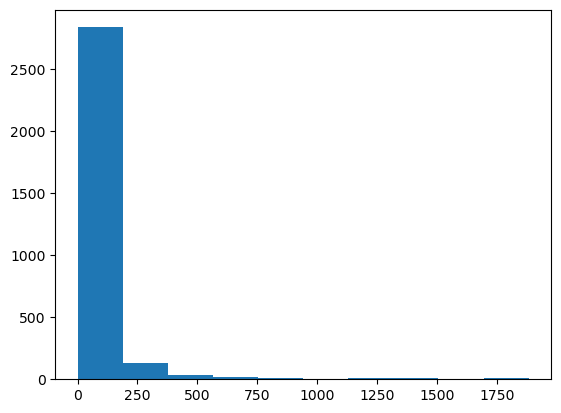

In [34]:
# Bird species anlaysis:
bird_spe = (
    df.groupby("birdnet_common_name")
    .size()
    .reset_index(name="count")
    .sort_values(by=["count"], ascending=False)
)
display(bird_spe.head(10))
plt.hist(bird_spe[bird_spe["count"] < 2000]["count"])
plt.show()
# Comment:
# traning data contains 3083 unique species, top 3 common species are House Sparrow, Eurasian Skylark, Northern Mockingbird
# the identification frequency of most bird species is under 250

Confidence anlaysis

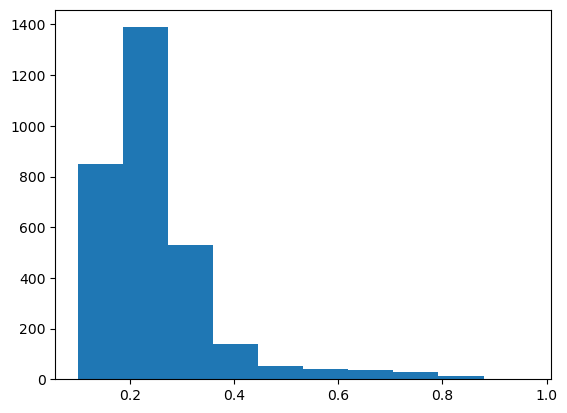

 4.25 % of bird species whose confidence is larger than 0.5


In [60]:
bird_conf = (
    df.groupby("birdnet_common_name")["confidence"]
    .mean()
    .reset_index(name="avg conf")
    .sort_values(by=["avg conf"], ascending=False)
)
plt.hist(bird_conf["avg conf"])
plt.show()
conf05 = len(bird_conf[bird_conf["avg conf"] > 0.5]) / len(
    bird_spe
)  # proportion of bird species whose confidence is larger than 0.5
print(f"{conf05*100: .2f} % of bird species whose confidence is larger than 0.5")

,birdnet_common_name,count,avg conf
0,House Sparrow,9126,0.424709
1,Eurasian Skylark,6925,0.629225
2,Northern Mockingbird,5868,0.412637
3,Northern Cardinal,4680,0.559305
4,Barn Owl,4137,0.747095
5,Canada Goose,4125,0.625478
6,Mallard,4096,0.561048
7,Western Meadowlark,4021,0.549890
8,House Finch,3758,0.556682
9,Common Sandpiper,3686,0.857731


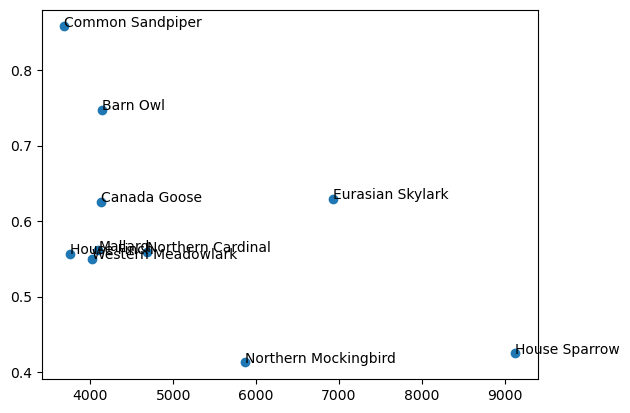

In [75]:
top10bird = bird_spe.head(10)
bird_conf10 = bird_conf[
    bird_conf["birdnet_common_name"].isin(top10bird["birdnet_common_name"].values)
]
top10bird = top10bird.merge(bird_conf10, on="birdnet_common_name")
display(top10bird)

plt.scatter(top10bird["count"], top10bird["avg conf"])
for i, txt in enumerate(top10bird["birdnet_common_name"].values):
    plt.annotate(txt, (top10bird["count"][i], top10bird["avg conf"][i]))
plt.show()